## Business Understanding
Business Understanding
Overview
Customer Churn is one of the most important and challenging problems for businesses such as Credit Card companies, cable service providers, SASS and telecommunication companies worldwide.

What is a Customer churn?

Customer churn can be used to define customers who:

Have completely stopped interacting or unsubscribed from a brand, or
Customers who have reduced how often they interact with your brand.
Customer churn is a metric used to gain insights into the Cust

## Data Understanding

We will use the SyriaTel dataset available on Kaggle (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). The goal is to "build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company".

# Import Relevant Packages

To initiate the analysis, we import the required libraries, including pandas, numpy, matplotlib.pyplot, seaborn, machine learning models,evaluation matrics and warnings. These libraries offer essential functionalities for data manipulation, visualization, and statistical analysis, providing the groundwork for our project. Let's proceed by importing the necessary packages and libraries:

In [783]:
# Basic data manipultion and analysis
import numpy as np
import pandas as pd

# Data visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

# Handling Class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# To ensure a more organized and tidy output, we suppress potential warnings that may arise during the execution of the code.
import warnings
warnings.filterwarnings('ignore')


# Reading the Dataset

The next step in our analysis involves opening the Syria Tel data file using pandas, a powerful Python library for data manipulation and analysis. By examining the first five rows of the dataset, we aim to gain an initial understanding of its structure and the information it contains.

In [784]:
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False




To facilitate a comprehensive exploration of our dataset, we have defined several custom functions:

    data_shape(data): This function reveals the shape of the DataFrame, providing the number of rows and columns in the dataset.
    data_info(data): Offering valuable insights, this function presents information about the data, such as column names, data types, and the count of non-null values in each column.
    data_missing(data): With a focus on data completeness, this function detects the presence of missing values by examining each column for null entries. If no missing values are found, a message indicating their absence is displayed.
    identify_duplicates(data): This function pinpoints and provides details about duplicate rows in the dataset. It computes the count and percentage of duplicated rows present. In case no duplicates exist, it conveys a message confirming their nonexistence.
    unique_column_duplicates(data, column): Specifically designed to handle duplicates within a designated column, this function calculates the number and percentage of duplicated rows for that specific column. If no duplicates are detected in the column, a message stating their absence is exhibited.
    data_describe(data): To gain a deeper understanding of numerical columns, this function showcases descriptive statistics such as count, mean, standard deviation, minimum, quartiles, and maximum.

In order to conduct a thorough exploration of our own dataset, we utilize these custom functions within our analysis. This ensures that we can seamlessly inspect the structure of our data, identify missing values, duplicates, and obtain essential summary statistics. Utilizing these functions will aid in our data analysis and decision-making process as we prepare for further modeling and analysis.


In [785]:
# Function to print the shape of the DataFrame
def data_shape(data):
    print("Data Shape:")
    print(f"Number of Rows: {data.shape[0]}")
    print(f"Number of Columns: {data.shape[1]}\n")

# Function to display information about the data
def data_info(data):
    print("Data Information:")
    print(data.info())

# Function to check for missing values
def data_missing(data):
    print("\nMissing Values:")
    print(data.isnull().sum())
# Function to identify and display duplicate rows
def identify_duplicates(data):
    duplicates = data[data.duplicated()]
    print("\nDuplicate Rows:")
    print(duplicates)
# Function to display descriptive statistics of numerical columns
def data_describe(data):
    print("\nDescriptive Statistics:")
    print(data.describe())

In [786]:
# Function to explore the dataset
def explore_dataset(data):
    data_shape(data)
    data_info(data)
    data_missing(data)
    identify_duplicates(data)
    data_describe(data)

In [787]:
# Call the fuction to explore the dataset
explore_dataset(data)

Data Shape:
Number of Rows: 3333
Number of Columns: 21

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes

## Data cleaning

The data provided consists of 3333 records with 21 columns. Upon analyzing the dataset, I found out there are no missing values,duplicates. Data preparation can be done.

In [788]:
# Define a fuction to calculate the percentage of duplicates in each column of our dataset
def calculate_missing_percentage(data):
    # Calculate the total number of records
    total_records = len(data)

    # Check for missing values and calculate the percentage for each column
    missing_count = data.isnull().sum()
    missing_percentage = (missing_count / total_records) * 100

    # Create a DataFrame to store the missing values and percentages
    missing_data_df = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage (%)': missing_percentage
    })

    # Sort the DataFrame in ascending order based on the percentage of missing values
    missing_data_df = missing_data_df[missing_data_df['Missing Values'] > 0]
    missing_data_df.sort_values(by='Percentage (%)', ascending=True, inplace=True)

    return missing_data_df

# Assuming your dataset is named 'heart_data'
# Call the function to calculate missing percentages
missing_data_df = calculate_missing_percentage(data)

# Display the DataFrame with missing values and percentages
print(missing_data_df)

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [789]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Note: Considering the min and max values, we see the values are of different scales, so we can consider scaling.

## Data preparation


There are no missing values / duplicates/outliers. We can proceed to EDA . I decided to rename some columns.

In [790]:
data.rename(columns=
    {
        "Int'l plan": "international plan",
        "VMail Plan": "voicemail plan",
        "number vmail messages": "voicemail messages",
        "total eve minutes": "total evening mins",
        "total eve calls": "total evening calls",
        "total eve charge": "total evening charge",
        "total intl minutes": "total international minutes",
        "total intl calls": "total international calls",
        "total intl charge": "total international charge",
    },
         inplace=True)
data

,state,account length,area code,phone number,international plan,voice mail plan,voicemail messages,total day minutes,total day calls,total day charge,...,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Exploratory Data Analysis


## Univariate Analysis: Exploring Target Variable

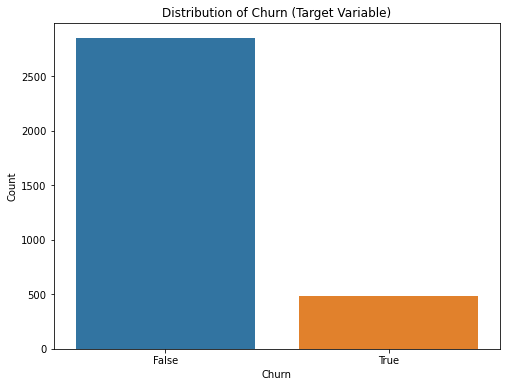

In [791]:
#Plot the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [792]:
class_distribution = data['churn'].value_counts()
print(class_distribution)

False    2850
True      483
Name: churn, dtype: int64


In [793]:
class_distribution = data['churn'].value_counts(normalize = True)
print(class_distribution)

False    0.855086
True     0.144914
Name: churn, dtype: float64


In [794]:
df1 = data.copy()
df1

,state,account length,area code,phone number,international plan,voice mail plan,voicemail messages,total day minutes,total day calls,total day charge,...,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [795]:

columns_to_drop = ['phone number', 'voice mail plan', 'voicemail messages']
df1.drop(columns=columns_to_drop, inplace=True,axis=1)
df1

,state,account length,area code,international plan,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [796]:
df1

,state,account length,area code,international plan,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Bivariate Analysis

total day charge versus churn

In [797]:

print("Maximum day charge:" , df1['total day charge'].max())

print("Manimum day charge:" , df1['total day charge'].min())
print("Average day charge:" , df1['total day charge'].mean())

Maximum day charge: 59.64
Manimum day charge: 0.0
Average day charge: 30.562307230723075


average day charge is 30

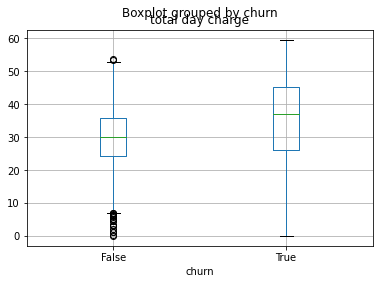

In [798]:
# plotting a boxplot to visualize total day charge by churn
df1.boxplot(column = 'total day charge', by = 'churn')
plt.show()

In [799]:
print("Maximum day calls:" , df1['total day calls'].max())

print("Manimum day calls:" , df1['total day calls'].min())
print("Average day calls:" , df1['total day calls'].mean())

Maximum day calls: 165
Manimum day calls: 0
Average day calls: 100.43564356435644


The non churn customers have a median of 100 calls. The median for the churn customers is slightly higher. 
Customers who are likely to churn on average make more calls.

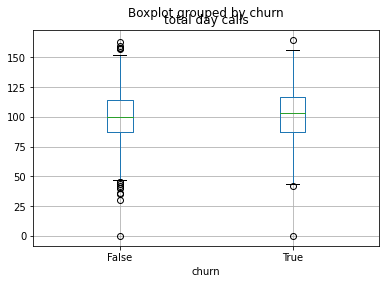

In [800]:
# plotting a boxplot to visualize total day calls by churn
df1.boxplot(column = 'total day calls', by = 'churn')
plt.show()

In [801]:
print("Maximum day minutes:" , df1['total day minutes'].max())

print("Manimum day minutes:" , df1['total day minutes'].min())
print("Average day minutes:" , df1['total day minutes'].mean())

Maximum day minutes: 350.8
Manimum day minutes: 0.0
Average day minutes: 179.77509750975094


average day minutes is 179

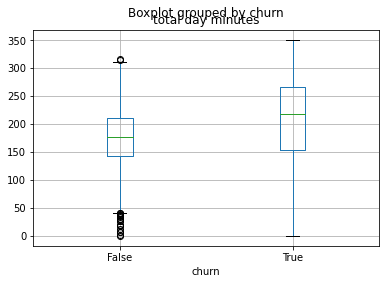

In [802]:
df1.boxplot(column = 'total day minutes', by = 'churn')
plt.show()

  Median for churn is higher than those who have not churned.

Hence customers who are likely to churn make more minutes on average.

The median for the churn customers is significantly higher than those in the non-churn class. This suggests that customers who are likely to churn are the customers who spend more minutes on the network.

In [803]:
# Create bins for account length
#df1['account_length_bin'] = pd.cut(df1['account length'], bins=bins)

# Calculate the churn rate for each account length bin
#churn_rate_by_length = df1.groupby('account_length_bin')['churn'].mean()

# Plot the churn rate
#plt.figure(figsize=(10, 6))
#sns.barplot(x=churn_rate_by_length.index, y=churn_rate_by_length.values, color='skyblue')
#plt.title('Churn Rate by Account Length')
#plt.xlabel('Account Length Bins')
#plt.ylabel('Churn Rate')
#plt.xticks(rotation=45)
#plt.show()

The Churn rate for customers with account length between 0 - 200 days is relatively stable. Customers with account length exceeding 200 days are likely to churn.

In [804]:
print("Account length max is:" , df1['account length'].max())

print("Account length min is:" , df1['account length'].min())
print("Account length mean is:" , df1['account length'].mean())

Account length max is: 243
Account length min is: 1
Account length mean is: 101.06480648064806


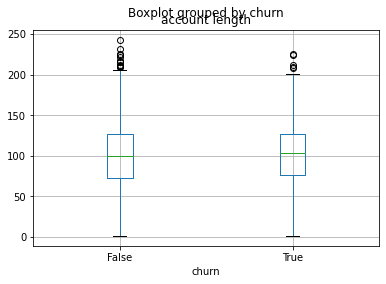

In [805]:
# plotting a boxplot to visualize account length by churn
df1.boxplot(column = 'account length', by = 'churn')
plt.show()

 There is no significant difference in the customers who have churned and those who have not.
 Customers who have not churned are likely to have a longer account length.

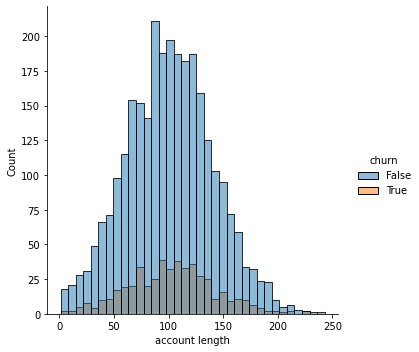

In [806]:
sns.displot(x="account length", data=df1, hue='churn');

From the boxplot visualization, there seems to be no significant differences between the two groups. From the histogram visualization, customers who are likely to churn are those who have held account with SyriaTel for shorter duration of time i.e., below the average of 100 days.

In [807]:
print("Maximum customer service calls:" , df1['customer service calls'].max())

print("Manimum customer service calls:" , df1['customer service calls'].min())
print("Average customer service calls:" , df1['customer service calls'].mean())

Maximum customer service calls: 9
Manimum customer service calls: 0
Average customer service calls: 1.5628562856285628


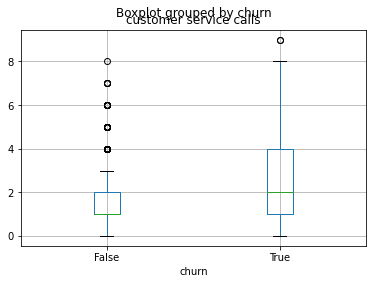

In [808]:
# plotting a boxplot to visualize customer service calls by churn
df1.boxplot(column = 'customer service calls', by = 'churn')
plt.show()

On average every customer makes a call to customer service once or makes one call. 
Above 2 calls the risk of churn increases.

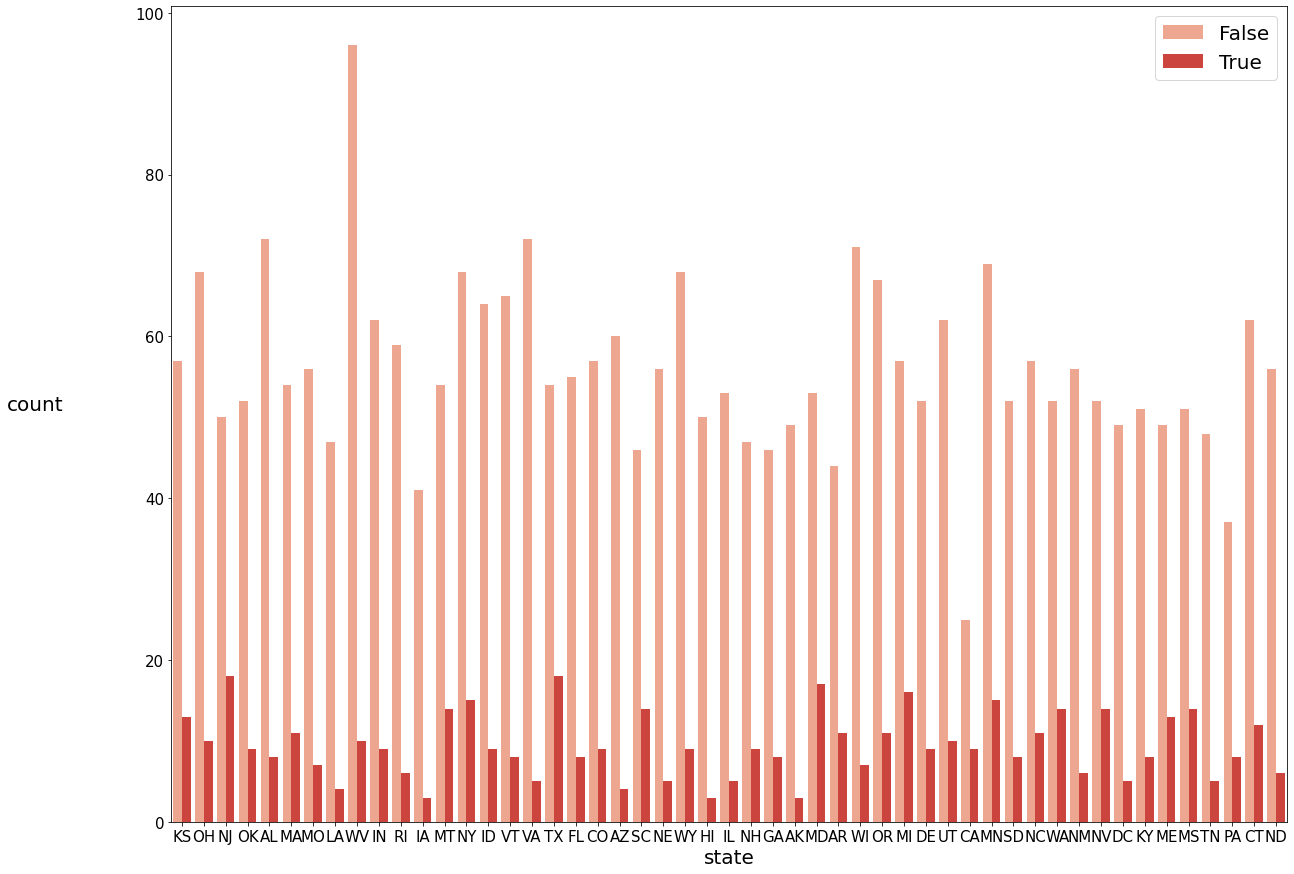

In [809]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.countplot(x='state', hue='churn', data=df1, palette='Reds')
ax.set_ylabel('count', rotation=0, labelpad=100,size=20)
ax.set_xlabel('state', size=20)
ax.legend(loc=0,fontsize=20);

ax.tick_params(labelsize=15)

From the illustration, we have to find out the cause of high churn rate in NJ,TX and MD.

In [810]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        3333 non-null   object 
 1   account length               3333 non-null   int64  
 2   area code                    3333 non-null   int64  
 3   international plan           3333 non-null   object 
 4   total day minutes            3333 non-null   float64
 5   total day calls              3333 non-null   int64  
 6   total day charge             3333 non-null   float64
 7   total evening mins           3333 non-null   float64
 8   total evening calls          3333 non-null   int64  
 9   total evening charge         3333 non-null   float64
 10  total night minutes          3333 non-null   float64
 11  total night calls            3333 non-null   int64  
 12  total night charge           3333 non-null   float64
 13  total internationa

## 1. Prepare the Data for Modeling


## Perfoming train test split

The target is 'churn'. Split `df1` into `X` and `y`, then perform a train-test split with `random_state=42` and `stratify=y` to create variables with the standard `X_train`, `X_test`, `y_train`, `y_test` names.

In [811]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into features (X) and target variable (y)
X = df1.drop("churn", axis=1)  
y = df1["churn"]

# Perform a train-test split
# stratify attribute because of class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Also, we should have roughly equal percentages of true churn for train vs. test targets:

In [812]:
print("Train percent true churn:", y_train.value_counts(normalize=True)[1])
print("Test percent true churn: ", y_test.value_counts(normalize=True)[1])

Train percent true churn: 0.1448579431772709
Test percent true churn:  0.145083932853717


## Data preprocessing

In [813]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        3333 non-null   object 
 1   account length               3333 non-null   int64  
 2   area code                    3333 non-null   int64  
 3   international plan           3333 non-null   object 
 4   total day minutes            3333 non-null   float64
 5   total day calls              3333 non-null   int64  
 6   total day charge             3333 non-null   float64
 7   total evening mins           3333 non-null   float64
 8   total evening calls          3333 non-null   int64  
 9   total evening charge         3333 non-null   float64
 10  total night minutes          3333 non-null   float64
 11  total night calls            3333 non-null   int64  
 12  total night charge           3333 non-null   float64
 13  total internationa

In [814]:
#df1.drop(['account_length_bin'],axis=1,inplace=True)

In [815]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        3333 non-null   object 
 1   account length               3333 non-null   int64  
 2   area code                    3333 non-null   int64  
 3   international plan           3333 non-null   object 
 4   total day minutes            3333 non-null   float64
 5   total day calls              3333 non-null   int64  
 6   total day charge             3333 non-null   float64
 7   total evening mins           3333 non-null   float64
 8   total evening calls          3333 non-null   int64  
 9   total evening charge         3333 non-null   float64
 10  total night minutes          3333 non-null   float64
 11  total night calls            3333 non-null   int64  
 12  total night charge           3333 non-null   float64
 13  total internationa

In [816]:

print(X_train["state"].value_counts())
print()
print(X_train["international plan"].value_counts())
print()


WV    81
WI    62
NY    61
MN    61
AL    59
ID    58
WY    57
CT    56
UT    56
FL    54
OH    54
VA    54
KS    54
MT    53
CO    53
TX    53
ME    52
NC    52
MD    52
NV    52
IN    52
MO    51
OR    51
NJ    51
MA    50
OK    49
AZ    49
VT    48
MI    48
MS    48
KY    47
NM    47
DE    47
NE    46
SD    46
IL    46
NH    45
RI    45
SC    45
WA    43
ND    42
DC    42
AR    42
LA    41
HI    40
TN    40
AK    40
GA    34
PA    33
IA    32
CA    25
Name: state, dtype: int64

no     2264
yes     235
Name: international plan, dtype: int64



In [817]:
# Mapping of state abbreviations to numeric values
state_mapping = {'KS': 1, 'OH': 2, 'NJ': 3, 'OK': 4, 'AL': 5, 'MA': 6, 'MO': 7,'LA': 8, 'WV': 9, 'IN': 10, 'RI': 11,
       'IA': 12, 'MT': 13, 'NY': 14, 'ID': 15, 'VT':16, 'VA': 17, 'TX': 18, 'FL': 19, 'CO': 20, 'AZ': 21, 'SC': 22,
       'NE': 23, 'WY': 24, 'HI': 25, 'IL': 26, 'NH': 27, 'GA': 28, 'AK': 29, 'MD': 30, 'AR': 31, 'WI': 32, 'OR': 33,
       'MI': 34, 'DE': 35, 'UT': 36, 'CA': 37, 'MN': 38, 'SD': 39, 'NC': 40, 'WA': 41, 'NM': 42, 'NV': 43, 'DC': 44,
       'KY': 45, 'ME': 46, 'MS': 47, 'TN': 48, 'PA': 49, 'CT': 50, 'ND': 51}
# Apply the mapping to the 'state' column
df1['state_numeric'] = df1['state'].map(state_mapping)

# Drop the original 'state' column
df2 = df1.drop('state', axis=1)
df2.head()

,account length,area code,international plan,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn,state_numeric
0,128,415,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1
1,107,415,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,2
2,137,415,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,3
3,84,408,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,2
4,75,415,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,4


In [818]:
# Mapping of 'yes' to 1 and 'no' to 0
international_plan_mapping = {'yes': 1, 'no': 0}

# Apply the mapping to the 'international_plan' column
df2['international_plan_numeric'] = df2['international plan'].map(international_plan_mapping)

# Drop the original 'international_plan' column
df2 = df2.drop(columns=['international plan'])
df2.head()

,account length,area code,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn,state_numeric,international_plan_numeric
0,128,415,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1,0
1,107,415,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,2,0
2,137,415,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,3,0
3,84,408,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,2,1
4,75,415,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,4,1


In [819]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   account length               3333 non-null   int64  
 1   area code                    3333 non-null   int64  
 2   total day minutes            3333 non-null   float64
 3   total day calls              3333 non-null   int64  
 4   total day charge             3333 non-null   float64
 5   total evening mins           3333 non-null   float64
 6   total evening calls          3333 non-null   int64  
 7   total evening charge         3333 non-null   float64
 8   total night minutes          3333 non-null   float64
 9   total night calls            3333 non-null   int64  
 10  total night charge           3333 non-null   float64
 11  total international minutes  3333 non-null   float64
 12  total international calls    3333 non-null   int64  
 13  total internationa

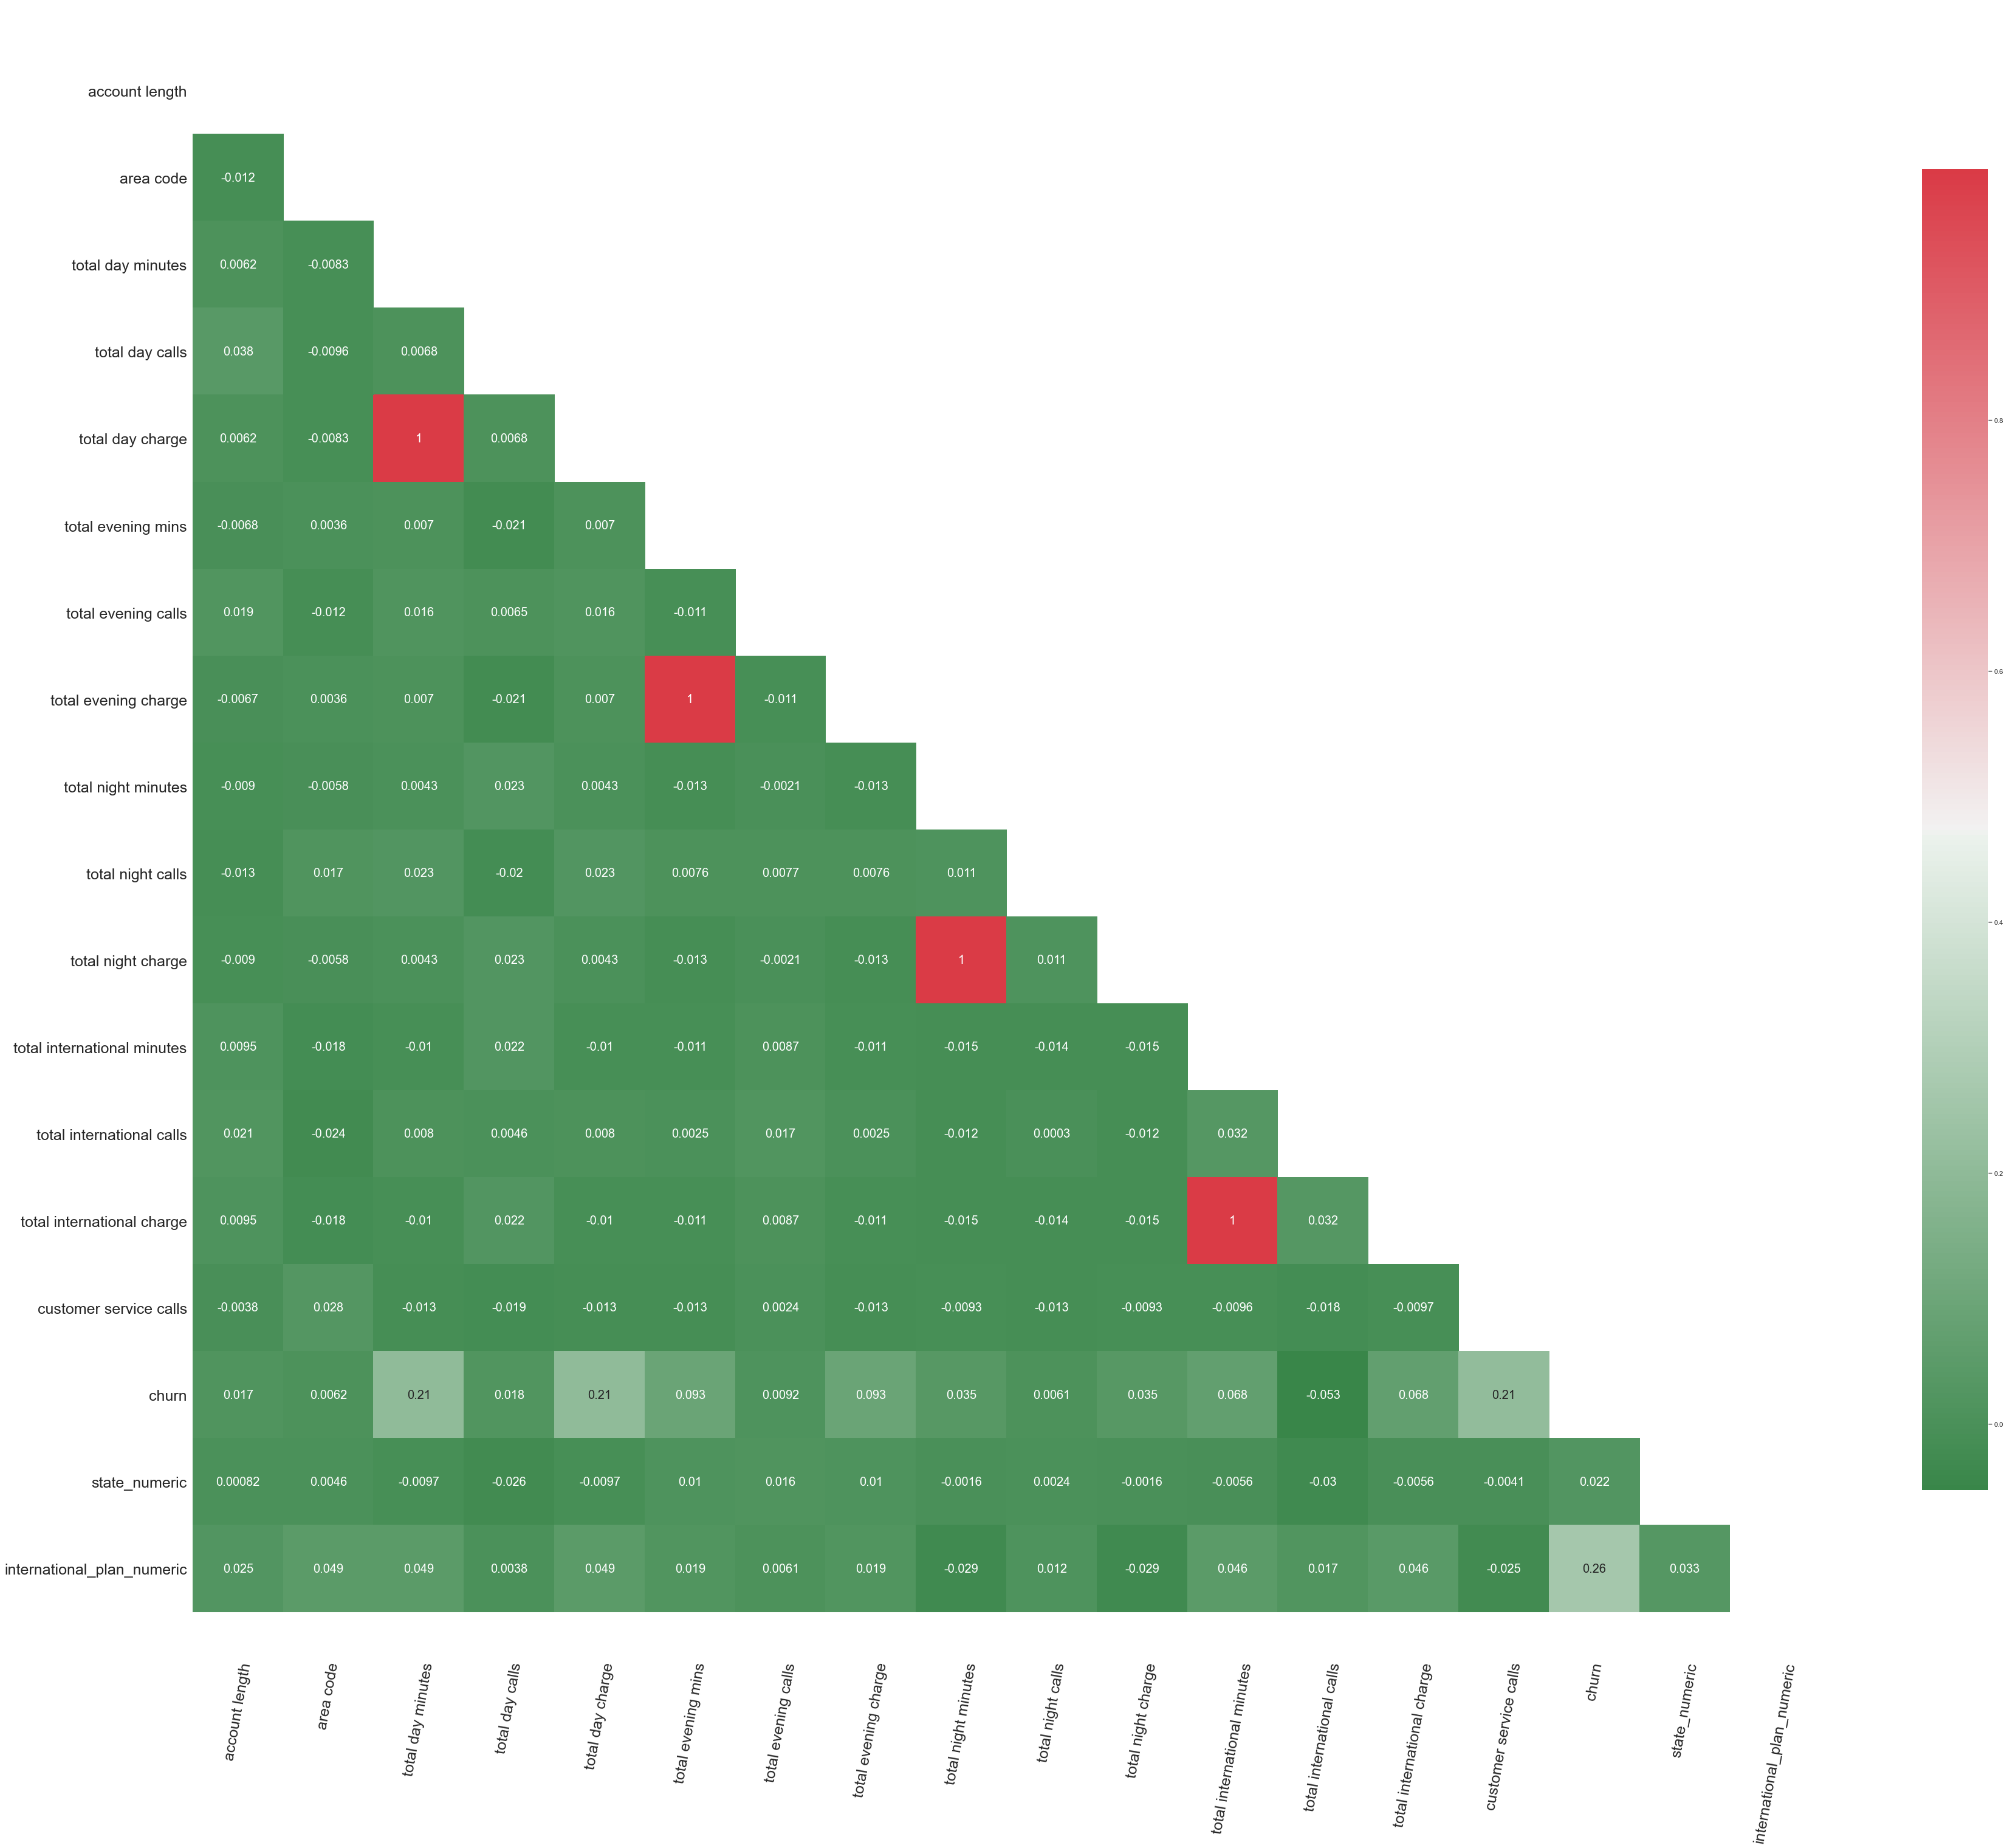

In [821]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = df2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10, as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

## Perform Train Test split

We'll use a random state of 42 and stratify=y (to ensure an even balance of tree types) in the train-test split. Recall that the target is churn

In [822]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into features (X) and target variable (y)
X = df2.drop("churn", axis=1)  
y = df2["churn"]

# Perform a train-test split
# stratify attribute because of class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Build and evaluate model

In [823]:

# Import relevant class and function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.3721116196527193

In [824]:
# Import relevant class 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit a Logistic Regression model
model = LogisticRegression(random_state=42)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Evaluate the model
# Predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Model Accuracy: 0.8501199040767387
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       713
        True       0.46      0.19      0.27       121

    accuracy                           0.85       834
   macro avg       0.67      0.58      0.59       834
weighted avg       0.81      0.85      0.82       834



Interpretation:

The model performs well in predicting the majority class ("False") with high precision (88%), recall (96%), and F1-Score (92%). However, the model struggles with the minority class ("True") with lower precision (46%), recall (19%), and F1-Score (27%). This indicates a potential issue with correctly identifying instances of the minority class.

Next Steps:

Consider addressing the class imbalance, as the lower performance on the minority class might be due to the imbalance. Explore techniques such as oversampling, undersampling, or using different evaluation metrics (e.g., area under the ROC curve) to better handle imbalanced datasets. Fine-tune the model parameters or consider using different models to see if performance can be improved.